In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
import torch
import torch.nn as nn
import plotly.express as px
import torch.nn.functional as F
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
plt.rcParams['figure.figsize'] = (6,5)

import warnings
warnings.filterwarnings("ignore")

In [3]:
# temp = pd.read_csv("Dataset/ ")

In [4]:
data = pd.read_csv("../input/testgrid/CleanedP.csv")

In [5]:
data.head()

,lat,lon,P
0,17.894722,73.401111,0.199450
1,17.894722,73.401389,0.194791
2,17.894722,73.402222,0.190133
3,17.894722,73.403056,0.204108
4,17.894722,73.403333,0.185475


In [6]:
data.corr()

,lat,lon,P
lat,1.000000,0.272859,0.499882
lon,0.272859,1.000000,0.061202
P,0.499882,0.061202,1.000000


In [7]:
# data  = data.rename(columns ={'Latitude':'lat', 'Longitude':'lon', 'Scaled ':'N'})
# data.head()

# Data Preprocessing

In [8]:
#drop duplicates rows
data.drop_duplicates(subset=['lat', 'lon'], inplace = True)
data = data.reset_index(drop = True)
data.head()

,lat,lon,P
0,17.894722,73.401111,0.199450
1,17.894722,73.401389,0.194791
2,17.894722,73.402222,0.190133
3,17.894722,73.403056,0.204108
4,17.894722,73.403333,0.185475


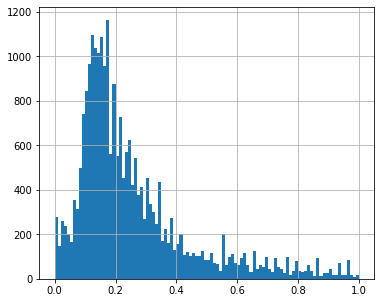

In [9]:
#visually check the distribution of data
data['P'].hist(bins = 100)
plt.show()

# Training data augmentation

In [10]:
train, test = train_test_split(data, test_size = 0.2, shuffle = True)
train.shape, test.shape

((19676, 3), (4920, 3))

In [11]:
train = train.reset_index(drop=True)
test = test.reset_index(drop = True)

In [12]:
# def knn_local(i, arg_df, df, k_neighbor):
#     x = df.iloc[:, :2].values
#     y = df.iloc[:, 2].values 
#     test = arg_df.iloc[i].values[np.newaxis, :]
#     # print(x.shape, y.shape, test.shape)
#     model = KNeighborsRegressor(weights='distance', n_neighbors=72)
#     # dist = torch.norm(data - test, dim=1, p=None)
#     # knn = dist.topk(k_neighbor, largest=False)
#     # values, indices = knn.values, knn.indices
#     model.fit(x, y)
#     value = model.predict(test)
#     return value

In [13]:
# def knn(i, arg_df, df, k_neighbor):
#     data = torch.from_numpy(df.values)
#     test = torch.from_numpy(arg_df.iloc[i].values)

#     dist = torch.norm(data - test, dim=1, p=None)
#     knn = dist.topk(k_neighbor, largest=False)
#     values, indices = knn.values, knn.indices
#     return values, indices

In [14]:
# def find_local_mean(data, data_arg, n_cols=100):
#   temp = data_arg.copy()
#   train_data = data.copy()
#   dist_arr = []
# #   temp['local_mean'] = np.asarray([0]*temp.shape[0])

#   local_mean_mean_arr = []
#   for i in range(temp.shape[0]):
#     # ref = (temp.lat.values[i], temp.lon.values[i])
#     val = knn_local(i, temp[['lat', 'lon']],train_data[['lat', 'lon', 'N']],  n_cols)

#     local_mean = val

#     local_mean_mean_arr.append(float(local_mean))

#   temp['local_mean'] = local_mean_mean_arr


#   return temp


In [15]:
# %%time
# local_data = find_local_mean(train, train, n_cols=72)

In [16]:
# local_train = local_data.copy()

In [17]:
# local_train.head(10)

In [18]:
# local_test = find_local_mean(train, test, n_cols = 72)

In [19]:
# local_test.head(10)

In [20]:
# def trainAugment(data, data_arg, n_cols=500):
#   temp = data_arg.copy()
#   train_data = data.copy()
#   dist_arr = []
#   for i in range(n_cols):
#     col_name = "neigh"+str(i)
#     arr = np.asarray([0]*temp.shape[0])
#     temp[col_name] = arr

#   for i in range(temp.shape[0]):
#     val= (i, temp[['lat', 'lon', 'local_mean']], train_data[['lat', 'lon', 'N']], n_cols)
#     # val = val.cpu().detach().numpy()
#     # indices = indices.cpu().detach().numpy()

#     for j in range(len(val)):
 
#       nutrient = val[j]
      
#       col_name = "neigh"+str(j)
#       temp.loc[i, col_name] = nutrient

#   return temp

In [21]:
# %%time
# train_data_aug = trainAugment(train, train, n_cols = 100)

In [22]:
# train_data_aug.head()

In [23]:
# train_data_aug = train_data_aug.iloc[:, 4:]
# train_data_aug['N'] = train['N']
# train_data_aug.head()

In [24]:
# train_data_aug.corr()

In [25]:
# %%time
# test_data_aug = trainAugment(train,test,  n_cols = 10)

In [26]:
# test_data_aug.head()

In [27]:
# test_data_aug = test_data_aug.iloc[:, 4:]
# test_data_aug['N'] = test['N']
# test_data_aug.head()

In [28]:
# test_data_aug.corr()

In [29]:
# train_data_aug.to_csv("/content/drive/MyDrive/BTech-Project/Dataset/TrainAugDataN.csv", index = False)

In [30]:
# test_data_aug.to_csv("/content/drive/MyDrive/BTech-Project/Dataset/TestAugDataN.csv", index = False)

In [31]:
# train_data_aug = pd.read_csv("/content/drive/MyDrive/BTech-Project/Dataset/TrainAugDataN.csv")
# test_data_aug = pd.read_csv("/content/drive/MyDrive/BTech-Project/Dataset/TestAugDataN.csv")


In [32]:
# train_data_aug.shape

In [33]:
# aug_data.min()

In [34]:
# data_ttrain, data_ttest = train_test_split(aug_data, test_size = 0.2, random_state = 42, shuffle = True)
# data_ttrain.shape, data_ttest.shape

In [35]:
# data_ttrain.head()

In [36]:
# data_ttrain.corr()

In [37]:
# train, test = train_test_split(data, test_size = 0.3, random_state = 42, shuffle = True)

In [38]:
# train.reset_index(drop=True)
# test.reset_index(drop=True)

# NP Model

In [39]:
class baseNPBlock(nn.Module):
    """relu non-linearities for NP block"""
    def __init__(self, inp_size,op_size, isnorm = True, bias = False, p = 0):
        """init function for linear2d class

        parameters
        ----------
        inp_size : int
                input dimension for the Encoder part (d_in)
        op_size : int
                output dimension for Encoder part(d_out)
        norm : str
                normalization to be applied on linear output
                pass norm == 'batch' to apply batch normalization
                else dropout normalization is applied
        bias : bool
                if True, bias is included for linear layer else discarded
        p : float
                probality to be considered while applying Dropout regularization
                
        """
        super().__init__()
        self.linear = nn.Linear(inp_size,op_size,bias = bias)
        self.relu  = nn.ReLU()
        self.batch_norm = nn.BatchNorm2d(inp_size)
        self.dropout = nn.Dropout2d(p)
        self.isnorm = isnorm
        self.tanh = nn.Tanh()
        
    def forward(self,x):
        # print("bef",x.shape)
        # x = self.linear(x)    
        if self.isnorm:
            x = self.batch_norm(x.permute(0,2,1)[:,:,:,None]) 
            # print("after BN",x.shape)
            x = self.dropout(x)
            x = x[:,:,:,0].permute(0,2,1)
        x = self.linear(x)
        x = self.relu(x)
        return x

In [40]:
class batch_MLP(nn.Module):
    """ Batch MLP layer for NP-Encoder"""
    def __init__(self, in_size, op_size, last_op_size,  num_layers, isnorm = True, p = 0):
        """init function for linear2d class
        
        parameters
        ----------
        inp_size : int
                input dimension for the Encoder part (d_in)
        op_size : int
                output dimension for Encoder part(d_out)
        norm : str
                normalization to be applied on linear output
                pass norm == 'batch' to apply batch normalization
                else dropout normalization is applied
                
        return torch.tensor of size (B,num_context_points,d_out)
        """
        super().__init__()
        self.in_size = in_size
        self.op_size = op_size
        self.num_layers = num_layers
        self.isnorm  = isnorm
        
        self.first_layer = baseNPBlock(in_size, op_size, self.isnorm, False,p)
        self.encoder = nn.Sequential(*[baseNPBlock(op_size, op_size, self.isnorm, False, p) for layer in range(self.num_layers-2)])
        self.last_layer = nn.Linear(op_size, last_op_size )
        
    def forward(self, x):
        x = self.first_layer(x)
        x = self.encoder(x)
        x = self.last_layer(x)
        
        return x

In [41]:
class LinearAttention(nn.Module):
    def __init__(self,in_ch, out_ch):
        super().__init__()
        self.linear = nn.Linear(in_ch, out_ch, bias = False)
        torch.nn.init.normal_(self.linear.weight,std = in_ch**0.5) #initilize weight matrix
        
    def forward(self,x):
        return self.linear(x)
    
    
class AttentionModule(nn.Module):
    def __init__(
        self,
        hidden_dim, 
        attn_type , 
        attn_layers,
        x_dim, 
        rep='mlp',
        n_multiheads = 8,
        isnorm = True,
        p = 0):
        
        super().__init__()
        self.rep = rep

        # rep determines whether raw input given to the model would be used as key and query or
        # it's output through MLP. 
        if self.rep =='mlp':
            
            self.batch_mlpk = batch_MLP(x_dim, hidden_dim, hidden_dim, attn_layers, isnorm ,p)
            self.batch_mlpq = batch_MLP(x_dim, hidden_dim, hidden_dim, attn_layers, isnorm, p)
        
        
        if attn_type == 'uniform':
            self.attn_func = self.uniform_attn
        if attn_type=='laplace':
            self.attn_func = self.laplace_attn
        if attn_type == 'dot':
            self.attn_func = self.dot_attn
        elif attn_type == 'multihead':
            self.w_k = nn.ModuleList([LinearAttention(hidden_dim,hidden_dim) for head in range(n_multiheads)])
            self.w_v = nn.ModuleList([LinearAttention(hidden_dim,hidden_dim) for head in range(n_multiheads)])
            self.w_q = nn.ModuleList([LinearAttention(hidden_dim,hidden_dim) for head in range(n_multiheads)])
            
            self.w = LinearAttention(hidden_dim*n_multiheads,hidden_dim)
            self.attn_func = self.multihead_attn
            self.num_heads = n_multiheads
            
            
            
    def forward(self, k, q, v):
        
        if self.rep =='mlp':
            k = self.batch_mlpk(k) #(B, n, H)
            q = self.batch_mlpq(q) #(B, m, H)
        rep = self.attn_func(k,q,v)
        
        return rep
    
    
    def uniform_attn(self, k, q, v):
        num_points = q.shape[1]
        rep = torch.mean(v, axis = 1, keepdim = True)
        rep = rep.repeat(1,num_points,1)
        
        return rep
    
    def laplace_attn(self, k, q, v, scale = 0.5):
        k = k.unsqueeze(1)
        v = v.unsqueeze(2)
        
        w = torch.abs((k-v)*scale)
        w = w.sum(dim = -1)
        weight = torch.softmax(w, dim = -1)
        
        #batch matrix multiplication (einstein summation convention for tensor)
        rep = torch.einsum("bik, bkj -> bij",weight, v)
        
        return rep
    
    
    def dot_attn(self, k, q, v):
  
        β = q.shape[-1]**0.5
        w_unnorm = torch.einsum('bjk,bik->bij', k, q)/β
        
        weight = torch.softmax(w_unnorm, dim = -1)
        rep = torch.einsum("bik, bkj -> bij",weight, v)
        return rep
    
    def multihead_attn(self, k , q, v):
        outs = []
        
        for i in range(self.num_heads):
            k = self.w_k[i](k) #(B, n, H)
            q = self.w_q[i](q) #(B, m, H)
            v = self.w_v[i](v) #(B, n, H)
            out = self.dot_attn(k, q, v)
            outs.append(out)
            
        outs = torch.stack(outs, dim = -1) #(B, m, H, n_heads)
        outs = outs.view(outs.shape[0], outs.shape[1], -1) #(B, m, n_heads*H)
        rep = self.w(outs) #(B, m, H)
        
        return rep
    
    

In [42]:
class DeterministicEncoder(nn.Module):
    def __init__(
                self,
                in_dim,
                x_dim,
                isnorm = True,
                hidden_dim = 32,
                n_encoder_layer = 2,
                rep = 'mlp',
                self_attn_type ='dot',
                cross_attn_type ='dot',
                n_multiheads = 8,
                p_encoder = 0,
                p_attention = 0,
                attn_layers = 2,
                use_self_attn = False
                ):
        super().__init__()
        
        self.use_self_attn = use_self_attn
        
        self.encoder = batch_MLP(in_dim, hidden_dim, hidden_dim, n_encoder_layer,isnorm, p_encoder)
        
        if self.use_self_attn:
            self.self_attn = AttentionModule(hidden_dim, self_attn_type, attn_layers,x_dim, rep = 'identitiy',isnorm = isnorm, p = p_attention, n_multiheads = n_multiheads)
            
        self.cross_attn = AttentionModule(hidden_dim, cross_attn_type, attn_layers, x_dim, rep ='mlp', isnorm = isnorm, p = p_attention, n_multiheads = n_multiheads)
        
    
    def forward(self, context_x, context_y, target_x):
        #concatenate context_x, context_y along the last dim.
        det_enc_in = torch.cat([context_x, context_y], dim = -1)
        
        det_encoded = self.encoder(det_enc_in) #(B, n, hd)
        if self.use_self_attn:
            det_encoded = self.self_attn(det_encoded, det_encoded, det_encoded) #(B, n, hd)

        h = self.cross_attn(context_x, target_x, det_encoded) #(B, n, hd)
        
        return h
        
        
    
        
        

In [43]:
class LatentEncoder(nn.Module):
    def __init__(self,
                in_dim,
                 x_dim,
                hidden_dim = 32,
                latent_dim = 32,
                self_attn_type = 'dot',
                encoder_layer = 3,
                 n_multiheads = 8,
                min_std = 0.01,
                isnorm = True,
                p_encoder = 0,
                p_attn = 0,
                use_self_attn = False,
                attn_layers = 2,
                 rep ='mlp'
                ):
        
        super().__init__()
        
        self._use_attn = use_self_attn
        
        self.encoder = batch_MLP(in_dim, hidden_dim,hidden_dim, encoder_layer,isnorm, p_encoder)
        
        if self._use_attn:
            self.self_attn = AttentionModule(hidden_dim, self_attn_type, attn_layers,x_dim, rep = rep,isnorm = isnorm, p = p_attn, n_multiheads = n_multiheads)
        
        self.secondlast_layer = nn.Linear(hidden_dim, hidden_dim)
        self.mean = nn.Linear(hidden_dim, latent_dim)
        self.l_sigma = nn.Linear(hidden_dim, latent_dim) 
        self.min_std = min_std
        self.use_attn = use_self_attn
        
        self.relu = torch.nn.ReLU()
        
    def forward(self,x,y):
        encoder_inp = torch.cat([x,y], dim = -1) 
        encoded_op = self.encoder(encoder_inp)#(B, n, hd)

        if self.use_attn:
            encoded_op = self.self_attn(encoded_op, encoded_op, encoded_op) #(B, n, hd)
            

        mean_val = torch.mean(encoded_op, dim = 1) #mean aggregation over all the points (B, hd)
    
        #further MLP layer that maps parameters to gaussian latent
        mean_repr = self.relu(self.secondlast_layer(mean_val)) #(B, hd)

        μ = self.mean(mean_repr) # (B, ld)

        log_scale = self.l_sigma(mean_repr) #(B, ld)
        
        #to avoid mode collapse
        σ = self.min_std + (1-self.min_std)*torch.sigmoid(log_scale*0.5) #(B, ld)

        dist = torch.distributions.Normal(μ, σ)
        
        return dist
        
        
            

In [44]:
class Decoder(nn.Module):
    def __init__(self,
                 x_dim,
                 y_dim,
                 hidden_dim = 32,
                 latent_dim = 32,
                 n_decoder_layer = 3,
                 use_deterministic_path = True,
                 min_std = 0.01,
                 isnorm = True,
                 dropout_p = 0,
                ):
        super().__init__()
        
        self.isnorm = isnorm
        self.target_transform = nn.Linear(x_dim, hidden_dim)
        
        if use_deterministic_path:
            hidden_dim_2 = hidden_dim + latent_dim + x_dim
        else:
            hidden_dim_2 = latent_dim + x_dim
            
        self.decoder = batch_MLP(hidden_dim_2, hidden_dim_2, 2, n_decoder_layer, isnorm, dropout_p)
        

        self.deterministic_path = use_deterministic_path
        self.min_std = min_std
        
        
    def forward(self, rep,  t_x):

        hidden_decode = torch.cat([rep,t_x], dim = -1)

        hidden_decode = self.decoder(hidden_decode)
        mean, log_sigma = hidden_decode[:, : ,:1],hidden_decode[:, :, 1:] 
        
        #clamp sigma
        sigma = self.min_std + (1 - self.min_std) * F.softplus(log_sigma)
        
        dist = torch.distributions.Normal(mean,sigma)
        
        return dist, mean, sigma

In [45]:
class LatentModel(nn.Module):
    def __init__(self,
               x_dim,
               y_dim,
               hidden_dim = 32,
               latent_dim = 32,
               latent_self_attn_type = 'dot',
               det_self_attn_type = 'dot',
               det_cross_attn_type = 'multihead',
               n_multiheads = 8,
               n_lat_enc_layer = 2,
               n_det_enc_layer = 2,
               n_decoder_layer = 2,
               rep ='mlp',
               use_deterministic_enc = False,
               min_std = 0.01,
               p_drop = 0,
               isnorm = True,
               p_attn_drop = 0,
               attn_layers = 2,
               use_self_attn = False,
               context_in_target = True
                ):
        
        super().__init__()
        self.laten_encoder = LatentEncoder(x_dim+y_dim,
                                           x_dim,
                                           hidden_dim=hidden_dim,
                                           latent_dim=latent_dim,
                                           self_attn_type=latent_self_attn_type,
                                           encoder_layer=n_lat_enc_layer,
                                           n_multiheads = n_multiheads,
                                           min_std=min_std,
                                           isnorm = isnorm,
                                           p_encoder=p_drop,
                                           p_attn=p_attn_drop,
                                           rep = 'identity',
                                           use_self_attn=use_self_attn,
                                           attn_layers=attn_layers 
                                          )
        self.deterministic_encoder = DeterministicEncoder(x_dim+y_dim,
                                                          x_dim,
                                                          isnorm = isnorm,
                                                          hidden_dim=hidden_dim,
                                                          n_encoder_layer=n_det_enc_layer,
                                                          rep=rep,
                                                          self_attn_type=det_self_attn_type,
                                                          cross_attn_type=det_cross_attn_type,
                                                          p_encoder=p_drop,
                                                          p_attention=p_attn_drop,
                                                          attn_layers=attn_layers,
                                                          use_self_attn=use_self_attn,
                                                          n_multiheads = n_multiheads
                                                         )
        self.decoder = Decoder(x_dim,
                              y_dim,
                              hidden_dim  = hidden_dim,
                              latent_dim=latent_dim,
                              n_decoder_layer=n_decoder_layer,
                              use_deterministic_path=use_deterministic_enc,
                              min_std=min_std,
                              isnorm=isnorm,
                              dropout_p=p_drop
                              )
        self.use_deterministic_enc = use_deterministic_enc
        self.context_in_target = context_in_target
        
        
    def forward(self, c_x, c_y, t_x, t_y = None, training = False):
        dist_prior = self.laten_encoder(c_x, c_y)

        if t_y is not None:
            dist_posterior = self.laten_encoder(t_x, t_y)
            z = dist_posterior.sample() #(B, ld)
        else:
            z = dist_prior.sample() #(B, ld)
            
        n_target = t_x.shape[1]
        z = z.unsqueeze(1).repeat(1, n_target,1) #(B, n_target, 1)
        
        
        
        if self.use_deterministic_enc:
            r = self.deterministic_encoder(c_x, c_y, t_x) #(B, n_target=m, H)

            representation = torch.cat([r, z], axis = -1) #(B, ld+hd)
        else:
            representation = z

        dist, μ, σ = self.decoder(representation, t_x)

        #at test time, target y is not Known so we return None
        if t_y is not None:

            log_p = dist.log_prob(t_y) #(B, m, 1)
            
            kl_loss = torch.distributions.kl_divergence(dist_posterior, dist_prior).sum(dim = -1, keepdim = True)

            kl_loss = kl_loss.repeat([1, n_target])[:,:, None]


            loss  = -(torch.mean(log_p - kl_loss/n_target))

            mse_loss = F.mse_loss(dist.loc, t_y, reduction = 'none')[:,:c_x.size(1)].mean()

        else:
            kl_loss = None
            log_p = None
            mse_loss = None
            loss = None
            
        y_pred = μ
            
        return y_pred,  dict(loss = loss, loss_p = log_p, loss_kl = kl_loss, mse_loss = mse_loss), dist



In [46]:
from sklearn.metrics import mean_squared_error

## Dataloader

In [47]:
class NutrientsDataset(Dataset):
    def __init__(self, df, num_context=40, num_extra_target=10):
        self.df = df
        self.num_context = num_context
        self.num_extra_target = num_extra_target

    def get_rows(self, i):
        rows = self.df.iloc[i : i + (self.num_context + self.num_extra_target)].copy()
        x = rows.iloc[:,:2].copy()
        y = rows.iloc[:,2:].copy()
        return x, y


    def __getitem__(self, i):
        x, y = self.get_rows(i)
        return x.values, y.values
        
    def __len__(self):
        return len(self.df) - (self.num_context + self.num_extra_target)

In [48]:
def npsample_batch(x, y, size=None, sort=False):
    
    """Sample from numpy arrays along 2nd dim."""
    inds = np.random.choice(range(x.shape[1]), size=size, replace=False)
    return x[:, inds], y[:, inds]

def collate_fns(max_num_context, max_num_extra_target, sample, sort=True, context_in_target=True):
    def collate_fn(batch, sample=sample):
        x = np.stack([x for x, y in batch], 0)
        y = np.stack([y for x, y in batch], 0)

        # Sample a subset of random size
        num_context = np.random.randint(40, max_num_context)
        num_extra_target = np.random.randint(30, max_num_extra_target)

        x = torch.from_numpy(x).float()
        y = torch.from_numpy(y).float()

        
        x_context = x[:, :max_num_context]
        y_context = y[:, :max_num_context]
    
        x_target_extra = x[:, max_num_context:]
        y_target_extra = y[:, max_num_context:]
        
        if sample:

            x_context, y_context = npsample_batch(
                x_context, y_context, size=num_context
            )

            x_target_extra, y_target_extra = npsample_batch(
                x_target_extra, y_target_extra, size=num_extra_target, sort=sort
            )

        # do we want to compute loss over context+target_extra, or focus in on only target_extra?
        if context_in_target:
            x_target = torch.cat([x_context, x_target_extra], 1)
            y_target = torch.cat([y_context, y_target_extra], 1)
        else:
            x_target = x_target_extra
            y_target = y_target_extra

        

        return x_context, y_context, x_target, y_target

    return collate_fn

In [49]:
# df_train = train_data_aug.copy()
# df_test = test_data_aug.copy()
df_train = train.copy()
df_test = test.copy()

In [50]:
df_train.head()

,lat,lon,P
0,18.413333,74.755833,0.128732
1,18.359167,74.763611,0.015033
2,18.380833,74.667778,0.169384
3,18.293333,74.823333,0.234597
4,18.497778,74.491111,0.151175


In [51]:
hparams = dict(num_context = 60,
               num_extra_target = 70,
               batch_size = 8,
               context_in_target = False)
train_df = NutrientsDataset(df_train,hparams['num_context'],hparams['num_extra_target'])

train_loader = DataLoader(train_df,
                         batch_size=hparams['batch_size'],
                         shuffle = True,
                         collate_fn=collate_fns(
                         hparams['num_context'],hparams['num_extra_target'], True, hparams['context_in_target']))

In [52]:
# df_train.head()

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
# def test_loader(context_df, target_df, target_batch=5000):
#   target = target_df.copy()
#   num_batch = int(target.shape[0]/target_batch)
#   for i in range(0, num_batch):

#     temp = target.iloc[i*target_batch:(i+1)*target_batch, :]
#     temp1 = pd.concat([context_df,temp ], ignore_index=True)
#     yield temp1
  

In [55]:
#eval loss
def validation(data_train, data_test, do_eval=True):
    """Run model on test/val data"""
    if do_eval:
        Regressor.eval()
    with torch.no_grad():
        target_x, target_y = data_test.iloc[:,:2], data_test.iloc[:,2:]
        context_x, context_y = data_train.iloc[:,:2], data_train.iloc[:,2:]
        context_x = torch.from_numpy(context_x.values).float()[None, :].to(device)
        context_y = torch.from_numpy(context_y.values).float()[None, :].to(device)
        target_x = torch.from_numpy(target_x.values).float()[None, :].to(device)
        target_y = torch.from_numpy(target_y.values).float()[None, :].to(device)
        y_pred, losses, extra = Regressor.forward(context_x, context_y, target_x, target_y, training = False)
        yr=(target_y-y_pred)[0].detach().cpu().numpy()
        r2 = r2_score(target_y.detach().cpu().numpy().flatten(), y_pred.detach().cpu().numpy().flatten())
        return yr, y_pred, r2, losses, extra 

In [56]:
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta

    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), 'checkpointP.pt')
        self.val_loss_min = val_loss

# Training

In [57]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.cuda.empty_cache()
    

In [58]:
device

device(type='cuda', index=0)

In [59]:
Regressor = LatentModel(2,len(df_train.columns)-2,
                        p_drop = 0,
                        p_attn_drop=0.3,
                        hidden_dim = 128,
                        latent_dim = 128,
                        n_decoder_layer = 2,
                        n_lat_enc_layer=4,
                        n_det_enc_layer=4,
                        n_multiheads = 3,
                        latent_self_attn_type = 'multihead',
                        det_self_attn_type = 'multihead',
                        det_cross_attn_type = 'multihead',
                        isnorm = True,
                        use_self_attn=False,
                        use_deterministic_enc=True,
                        context_in_target = False
                       )

In [60]:
opt = torch.optim.Adam(Regressor.parameters(), lr = 1e-3)
early_stopping = EarlyStopping(patience=7, verbose=True)
# lr_scheduler = torch.optim.lr_scheduler.StepLR(opt,
#                                                step_size=2,
#                                                gamma=0.9)
Regressor = Regressor.to(device)

In [61]:

from tqdm.auto import tqdm 
val_norm = df_test.shape[0]
mse_loss_train = []
mse_loss_eval = []
elbo_loss_train  = []
elbo_loss_eval = []
mae_val_loss = []
for epoch in range(200):
    loss = 0 
    mse_loss = 0
    Regressor.train()
    for batch in tqdm(train_loader):
        context_x, context_y, target_x, target_y = batch

        cx = context_x.to(device)
        cy = context_y.to(device)
        tx = target_x.to(device)
        ty = target_y.to(device)
        Regressor.zero_grad()

        y_pred, losses, extra = Regressor.forward(cx, cy, tx, ty, training=True)
        losses['loss'].backward()
        loss += losses['loss'].cpu().detach().numpy()
        mse_loss+=losses['mse_loss'].cpu().detach().numpy()
        opt.step()
        
    loss /= len(train_loader)
    elbo_loss_train.append(loss)
    mse_loss_train.append(mse_loss/len(train_loader))
    print(epoch)
    print('ELBO train_loss', loss)
    print('RMSE train_loss', (mse_loss/len(train_loader))**0.5)
    
    yr, ypred, r2, losses_val, extra = validation(df_train, df_test)
    mse_loss_val = losses_val['mse_loss'].cpu().detach().numpy()
    mse_loss_eval.append(mse_loss_val)
    elbo_loss_val = losses_val['loss'].cpu().detach().numpy() 
    val_loss = np.mean(np.abs(yr))

    elbo_loss_eval.append(elbo_loss_val)
    mae_val_loss.append(val_loss)
    

    print('ELBO val_loss', elbo_loss_val)
    print('RMSE val_loss', mse_loss_val**0.5)
    print('MAE val_loss', val_loss)
    print('R2 score', r2)
  
    print("-----------------------------------------------------------------------")

    early_stopping(elbo_loss_val, Regressor)
    if early_stopping.counter==5:
        
      lr=opt.state_dict()['param_groups'][0]['lr']
      print('reducing lr {:2.2e} to {:2.2e}'.format(lr, lr/10))
      opt = torch.optim.Adam(Regressor.parameters(), lr=lr/10)

    if early_stopping.early_stop:
        print("Early stopping")
        break
    

  0%|          | 0/2444 [00:00<?, ?it/s]

0
ELBO train_loss -0.4929588320591736
RMSE train_loss 0.17079935889962503
ELBO val_loss -0.595322
RMSE val_loss 0.1648395
MAE val_loss 0.111994155
R2 score 0.28929313941217294
-----------------------------------------------------------------------
Validation loss decreased (inf --> -0.595322).  Saving model ...


  0%|          | 0/2444 [00:00<?, ?it/s]

1
ELBO train_loss -0.6616770779247565
RMSE train_loss 0.1541660368995983
ELBO val_loss -0.70672333
RMSE val_loss 0.15275359
MAE val_loss 0.10890895
R2 score 0.38968945120011467
-----------------------------------------------------------------------
Validation loss decreased (-0.595322 --> -0.706723).  Saving model ...


  0%|          | 0/2444 [00:00<?, ?it/s]

2
ELBO train_loss -0.7120303651363682
RMSE train_loss 0.15216954689651271
ELBO val_loss -0.725818
RMSE val_loss 0.15192176
MAE val_loss 0.10642737
R2 score 0.39631839681969727
-----------------------------------------------------------------------
Validation loss decreased (-0.706723 --> -0.725818).  Saving model ...


  0%|          | 0/2444 [00:00<?, ?it/s]

3
ELBO train_loss -0.7343008739663419
RMSE train_loss 0.1503541326771482
ELBO val_loss -0.7388339
RMSE val_loss 0.1505067
MAE val_loss 0.10579987
R2 score 0.4075119193484197
-----------------------------------------------------------------------
Validation loss decreased (-0.725818 --> -0.738834).  Saving model ...


  0%|          | 0/2444 [00:00<?, ?it/s]

4
ELBO train_loss -0.7498145813759532
RMSE train_loss 0.14900633702486135
ELBO val_loss -0.7388137
RMSE val_loss 0.15070134
MAE val_loss 0.10394757
R2 score 0.4059784563638953
-----------------------------------------------------------------------
EarlyStopping counter: 1 out of 7


  0%|          | 0/2444 [00:00<?, ?it/s]

5
ELBO train_loss -0.7602183129851829
RMSE train_loss 0.14794394107125033
ELBO val_loss -0.73431116
RMSE val_loss 0.15124473
MAE val_loss 0.10621865
R2 score 0.4016869774227291
-----------------------------------------------------------------------
EarlyStopping counter: 2 out of 7


  0%|          | 0/2444 [00:00<?, ?it/s]

6
ELBO train_loss -0.7672042171371743
RMSE train_loss 0.14762551643812963
ELBO val_loss -0.75909215
RMSE val_loss 0.14932173
MAE val_loss 0.10450681
R2 score 0.41680470538654224
-----------------------------------------------------------------------
Validation loss decreased (-0.738834 --> -0.759092).  Saving model ...


  0%|          | 0/2444 [00:00<?, ?it/s]

7
ELBO train_loss -0.7737731971639268
RMSE train_loss 0.14779760529325198
ELBO val_loss -0.7614479
RMSE val_loss 0.14982323
MAE val_loss 0.10444357
R2 score 0.41288076542499197
-----------------------------------------------------------------------
Validation loss decreased (-0.759092 --> -0.761448).  Saving model ...


  0%|          | 0/2444 [00:00<?, ?it/s]

8
ELBO train_loss -0.781039996947575
RMSE train_loss 0.14723320445723467
ELBO val_loss -0.7570513
RMSE val_loss 0.15202348
MAE val_loss 0.10586859
R2 score 0.39550978610200427
-----------------------------------------------------------------------
EarlyStopping counter: 1 out of 7


  0%|          | 0/2444 [00:00<?, ?it/s]

9
ELBO train_loss -0.7839140888370586
RMSE train_loss 0.14733858422743673
ELBO val_loss -0.76453924
RMSE val_loss 0.1496845
MAE val_loss 0.10256693
R2 score 0.41396756083451824
-----------------------------------------------------------------------
Validation loss decreased (-0.761448 --> -0.764539).  Saving model ...


  0%|          | 0/2444 [00:00<?, ?it/s]

10
ELBO train_loss -0.7868856633548456
RMSE train_loss 0.14725892776420213
ELBO val_loss -0.7703071
RMSE val_loss 0.14822148
MAE val_loss 0.103130475
R2 score 0.42536744447406105
-----------------------------------------------------------------------
Validation loss decreased (-0.764539 --> -0.770307).  Saving model ...


  0%|          | 0/2444 [00:00<?, ?it/s]

11
ELBO train_loss -0.7894182021557407
RMSE train_loss 0.14698315782878532
ELBO val_loss -0.77059865
RMSE val_loss 0.14843899
MAE val_loss 0.10295885
R2 score 0.42367970897232954
-----------------------------------------------------------------------
Validation loss decreased (-0.770307 --> -0.770599).  Saving model ...


  0%|          | 0/2444 [00:00<?, ?it/s]

12
ELBO train_loss -0.7908203125048776
RMSE train_loss 0.14686900742722456
ELBO val_loss -0.77387327
RMSE val_loss 0.1482881
MAE val_loss 0.101866834
R2 score 0.42485078184039493
-----------------------------------------------------------------------
Validation loss decreased (-0.770599 --> -0.773873).  Saving model ...


  0%|          | 0/2444 [00:00<?, ?it/s]

13
ELBO train_loss -0.7928611308141152
RMSE train_loss 0.14681803016295164
ELBO val_loss -0.7636852
RMSE val_loss 0.14907013
MAE val_loss 0.104902215
R2 score 0.41876843392657626
-----------------------------------------------------------------------
EarlyStopping counter: 1 out of 7


  0%|          | 0/2444 [00:00<?, ?it/s]

14
ELBO train_loss -0.7941922039378879
RMSE train_loss 0.14670222275316228
ELBO val_loss -0.7748021
RMSE val_loss 0.14796285
MAE val_loss 0.10236715
R2 score 0.42737103188305114
-----------------------------------------------------------------------
Validation loss decreased (-0.773873 --> -0.774802).  Saving model ...


  0%|          | 0/2444 [00:00<?, ?it/s]

15
ELBO train_loss -0.7957450630060975
RMSE train_loss 0.14639530391856662
ELBO val_loss -0.76079434
RMSE val_loss 0.14790219
MAE val_loss 0.10243573
R2 score 0.4278404775697041
-----------------------------------------------------------------------
EarlyStopping counter: 1 out of 7


  0%|          | 0/2444 [00:00<?, ?it/s]

16
ELBO train_loss -0.7976909556628834
RMSE train_loss 0.14625029210387336
ELBO val_loss -0.74806184
RMSE val_loss 0.15054663
MAE val_loss 0.10634982
R2 score 0.4071975015296093
-----------------------------------------------------------------------
EarlyStopping counter: 2 out of 7


  0%|          | 0/2444 [00:00<?, ?it/s]

17
ELBO train_loss -0.7991891749654386
RMSE train_loss 0.14624145613246559
ELBO val_loss -0.7676684
RMSE val_loss 0.14850448
MAE val_loss 0.10243756
R2 score 0.4231711060974873
-----------------------------------------------------------------------
EarlyStopping counter: 3 out of 7


  0%|          | 0/2444 [00:00<?, ?it/s]

18
ELBO train_loss -0.8001551308384114
RMSE train_loss 0.14630675294104176
ELBO val_loss -0.762403
RMSE val_loss 0.14900665
MAE val_loss 0.10465311
R2 score 0.41926324263780734
-----------------------------------------------------------------------
EarlyStopping counter: 4 out of 7


  0%|          | 0/2444 [00:00<?, ?it/s]

19
ELBO train_loss -0.8004292828654307
RMSE train_loss 0.14616878094104951
ELBO val_loss -0.76208276
RMSE val_loss 0.14823821
MAE val_loss 0.1020816
R2 score 0.4252376678121883
-----------------------------------------------------------------------
EarlyStopping counter: 5 out of 7
reducing lr 1.00e-03 to 1.00e-04


  0%|          | 0/2444 [00:00<?, ?it/s]

20
ELBO train_loss -0.8122221332915286
RMSE train_loss 0.1451917216996341
ELBO val_loss -0.76120263
RMSE val_loss 0.14818175
MAE val_loss 0.102725334
R2 score 0.4256754537698556
-----------------------------------------------------------------------
EarlyStopping counter: 6 out of 7


  0%|          | 0/2444 [00:00<?, ?it/s]

21
ELBO train_loss -0.8128904501393852
RMSE train_loss 0.1452214616199149
ELBO val_loss -0.7640939
RMSE val_loss 0.14823483
MAE val_loss 0.1027563
R2 score 0.4252638962951508
-----------------------------------------------------------------------
EarlyStopping counter: 7 out of 7
Early stopping


## Evaluation

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [63]:
def loss_plot(train_loss, val_loss, title = ""):
#     x = x  = np.arange(0,100,1)
    plt.plot(train_loss, label ="train")
    plt.plot(val_loss, label = "val")
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.title(title)
    plt.legend()
    plt.show()

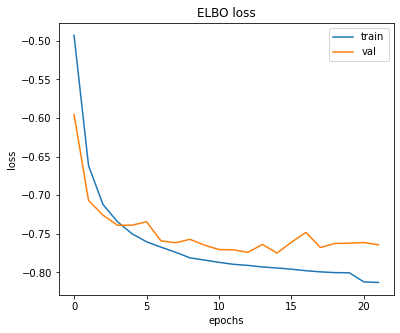

In [64]:
#Elbo loss plot
loss_plot(elbo_loss_train, elbo_loss_eval, "ELBO loss")

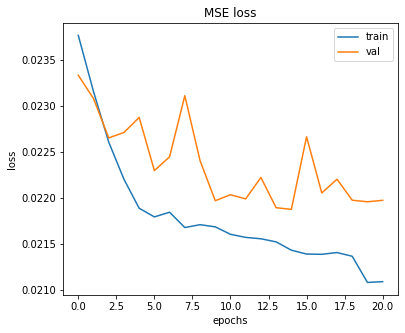

In [65]:
loss_plot(mse_loss_train[1:], mse_loss_eval[1:], "MSE loss")

In [66]:
#    Regressor.load_state_dict(torch.load("./checkpoint2.pt"))

In [67]:
## RMSE for trainig and testing error
yr_train, y_pred_train, _, losses, extra = validation(train, train)
yr_test, y_pred_test, _,  losses, extra = validation(train, test)

In [68]:
y_pred_train = y_pred_train[0].detach().cpu().numpy().flatten()
y_pred_test = y_pred_test[0].detach().cpu().numpy().flatten()

In [69]:
MAE = mean_absolute_error(train.iloc[:,-1], y_pred_train)
RMSE = mean_squared_error(train.iloc[:,-1], y_pred_train)

print("MAE for traing data = ", MAE)
print("RMSE for trainig data = ", RMSE**0.5)

MAE for traing data =  0.10000195193732372
RMSE for trainig data =  0.145878440125278


In [70]:
r2 = r2_score(train['P'], y_pred_train)
print("R2 for training set: ", r2)

R2 for training set:  0.426978567016029


In [71]:
r2 = r2_score(test['P'], y_pred_test)
print("R2 for test set: ", r2)

R2 for test set:  0.42497321501540486


In [72]:
MAE = mean_absolute_error(test.iloc[:,2], y_pred_test)
RMSE = mean_squared_error(test.iloc[:,2], y_pred_test)

print("MAE for test data = ", MAE)
print("RMSE for test data = ", RMSE**0.5)

MAE for test data =  0.10275256419232037
RMSE for test data =  0.1482723152532874


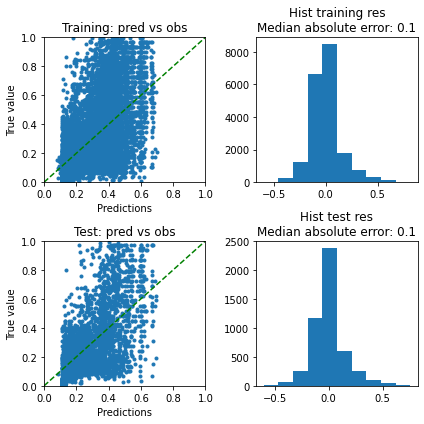

In [73]:
plt.figure(figsize=(6,6))
plt.subplot(221)
plt.plot(y_pred_train, train['P'], '.')
plt.title('Training: pred vs obs')
plt.xlabel('Predictions')
plt.ylabel('True value')
plt.plot([0, 1], [0, 1], 'g--')
plt.ylim(0, 1)
plt.xlim(0,1)
plt.subplot(222)
plt.hist(yr_train)
plt.title('Hist training res\nMedian absolute error: {:.1f}'.format(np.median(np.abs(yr_train))))
plt.subplot(223)
plt.plot(y_pred_test, test['P'], '.')
plt.plot([0,1], [0,1], 'g--')
plt.title('Test: pred vs obs')
plt.xlabel('Predictions')
plt.ylabel('True value')
plt.ylim(0,1)
plt.xlim(0,1)
plt.subplot(224)
plt.hist(yr_test)
plt.title('Hist test res\nMedian absolute error: {:.1f}'.format(np.median(np.abs(yr_test))))
plt.tight_layout()